In [6]:
# %load /Users/shleifer/flow/notes/preamble.py
import sys
sys.path = ['/Users/shleifer/flow/kensho-learn/', '/app/', '.'] + sys.path
%load_ext autoreload
%autoreload 2
%matplotlib inline
#from klearn.nb_start import *
%config InlineBackend.figure_format = 'retina'
from lane_lines.nb_start import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pickle

In [7]:
from lane_lines.fit_poly import rgb_read
from detection.window import slide_window

In [8]:
from detection.lesson_functions import *
from detection.utils import *

In [9]:
non_vehicles = glob.glob('non-vehicles/*/*')
vehicles = glob.glob('vehicles/*/*')

In [10]:
from lane_lines.viz import plot_side_by_side

In [ ]:
y_start_stop = [400, 800]

In [ ]:
from sklearn.utils import shuffle

In [ ]:
from detection.constants import PARAMS

In [ ]:
def showHOG(img, title='Title'):
    """
    Copied from web...
    Calculate HOG on the image `img` and the YCrCb color space and show them on a graph.
    """
    img_cspaced = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    _, hog_y = get_hog_features(img_cspaced[:,:,0],
                                PARAMS['orient'],
                                PARAMS['pix_per_cell'],
                                 PARAMS['cell_per_block'],
                                vis=True, feature_vec=True)
    _, hog_Cr = get_hog_features(img_cspaced[:,:,1],
                                PARAMS['orient'],
                                PARAMS['pix_per_cell'],
                                 PARAMS['cell_per_block'],
                                vis=True, feature_vec=True)    
    _, hog_Cb = get_hog_features(img_cspaced[:,:,2],
                    PARAMS['orient'],
                    PARAMS['pix_per_cell'],
                     PARAMS['cell_per_block'],
                    vis=True, feature_vec=True)
    fig, axes = plt.subplots(ncols=4, figsize=(15,15))
    axes[0].imshow(img)
    axes[0].set_title(title)
    axes[1].imshow(hog_y, cmap='gray')
    axes[1].set_title('HOG - Y')
    axes[2].imshow(hog_Cr, cmap='gray')
    axes[2].set_title('HOG - Cr')
    axes[3].imshow(hog_Cb, cmap='gray')
    axes[3].set_title('HOG - Cb')

showHOG(rgb_read(vehicles[0]), 'Vehicle')
showHOG(rgb_read(non_vehicles[0]), 'Non-vehicle')

In [ ]:
showHOG(rgb_read('test_images/frame_6.jpg'), 'Non-vehicle')

In [ ]:
plt.imshow(process_image(rgb_read('test_images/frame_6.jpg'), clf))

In [ ]:
import scipy

In [ ]:
scipy.misc.imsave('test_images/frame_6.jpg', bug)

In [ ]:

pickle.dump(Xmat, open('Xmat_darien.pkl', 'wb'))

In [ ]:
%%time
X = [single_img_features(rgb_read(path), **PARAMS) 
     for path in (
    vehicles + non_vehicles)]
Xmat = np.vstack(X)
y = np.concatenate([np.ones(len(vehicles)),np.zeros(len(non_vehicles))])

In [11]:
Xmat = pickle.load(open('Xmat4.pkl', 'rb'))
y = pickle.load(open('y4.pkl', 'rb'))

In [12]:
rand_state = 42

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    Xmat, y, test_size=0.2, random_state=rand_state)


In [14]:
#clf =  make_pipeline(StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))
clf =  make_pipeline(StandardScaler(), LogisticRegression(random_state=21,n_jobs=-1))

In [15]:
%%time
clf.fit(X_train, y_train)
print('Test Accuracy = ', round(clf.score(X_test, y_test), 4))

Test Accuracy =  0.992
CPU times: user 38.3 s, sys: 4.37 s, total: 42.7 s
Wall time: 44.4 s


In [16]:
clf.fit(Xmat, y) ## sneakily retrain on all data

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=21, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [17]:
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 1.  1.  0.  1.  1.  1.  1.  0.  0.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  1.  1.  1.  0.  0.  0.]
0.00236 Seconds to predict 10 labels with SVC


In [19]:
from detection.constants import *
from detection.search_classify import search_windows
from detection.heatmap import get_heatmap
from detection.window import slide_window
from detection.video import process_image
from detection.window import make_many_windows

In [20]:
# test shapes work
image = rgb_read('test_images/test1.jpg')
feat = single_img_features(cv2.resize(image, (64,64)), **PARAMS)
clf.predict(feat.reshape(1,-1))

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([ 0.])

In [21]:
test_paths = glob.glob('test_images/*')

test_images/frame_6.jpg


/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


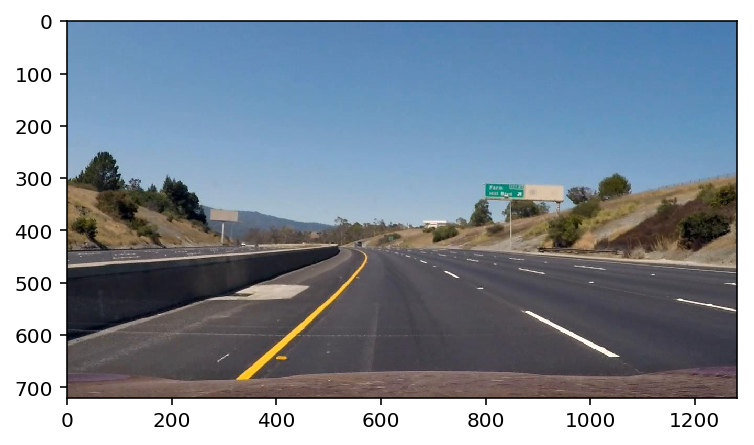

test_images/test1.jpg


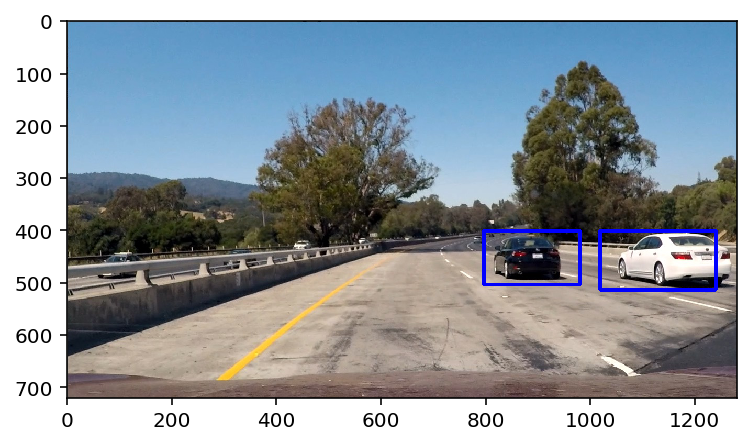

test_images/test2.jpg


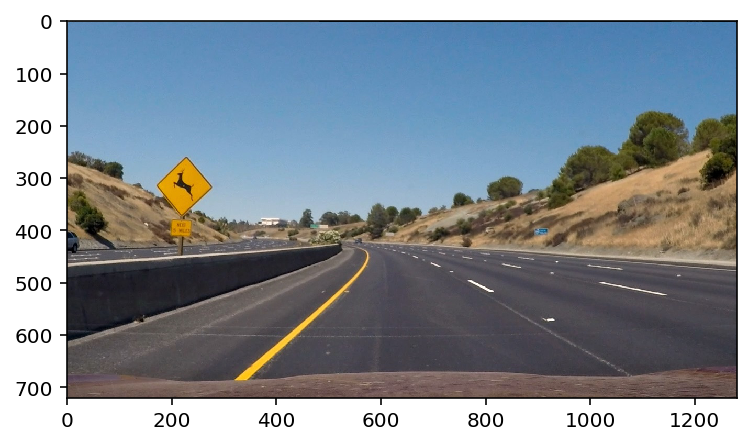

test_images/test3.jpg


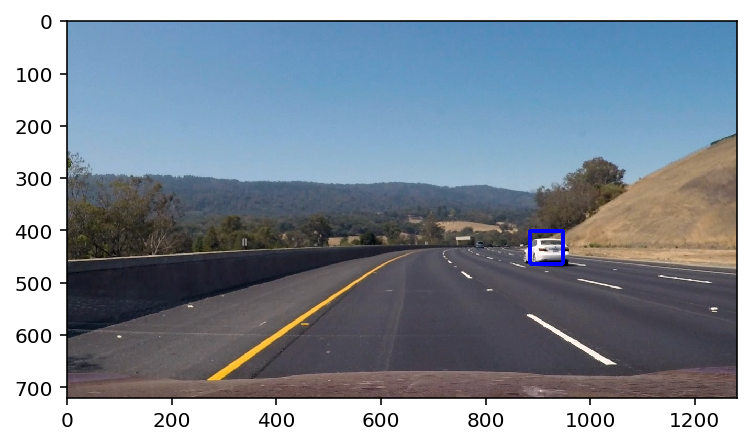

test_images/test4.jpg


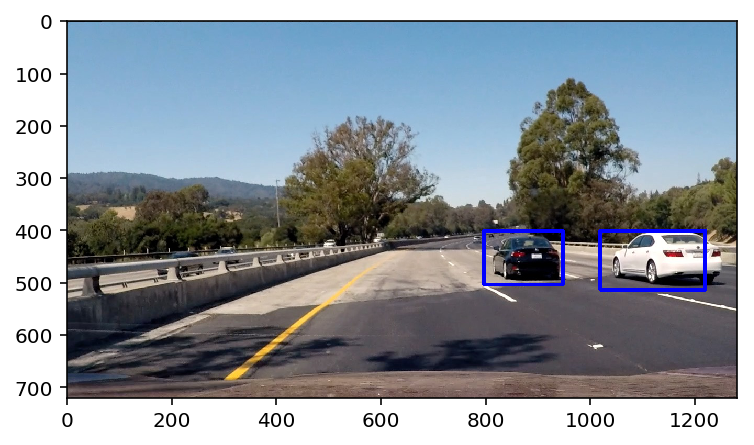

test_images/test5.jpg


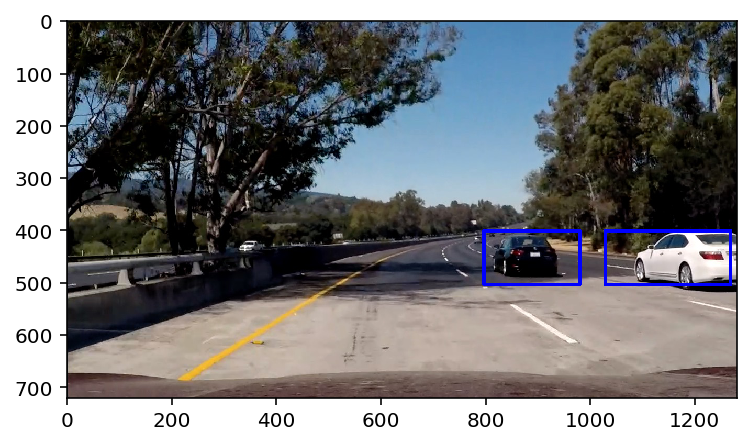

test_images/test6.jpg


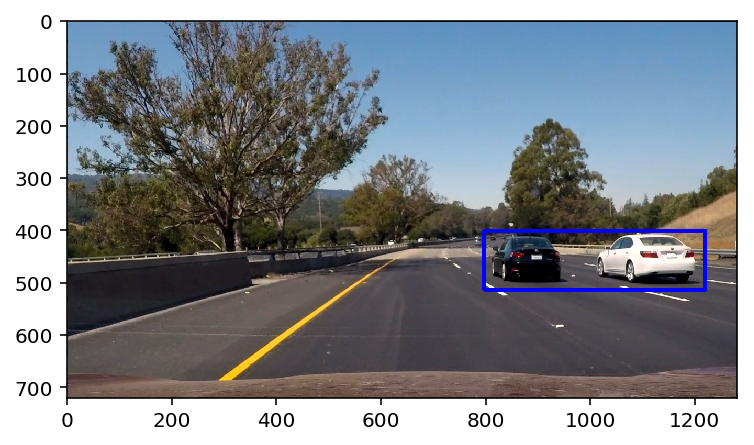

In [24]:
for path in test_paths:
    print(path)
    plt.imshow(process_image(rgb_read(path),
                             clf, search_params=PARAMS))
    plt.show()

In [25]:
from detection.video import draw_heat

/Users/shleifer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


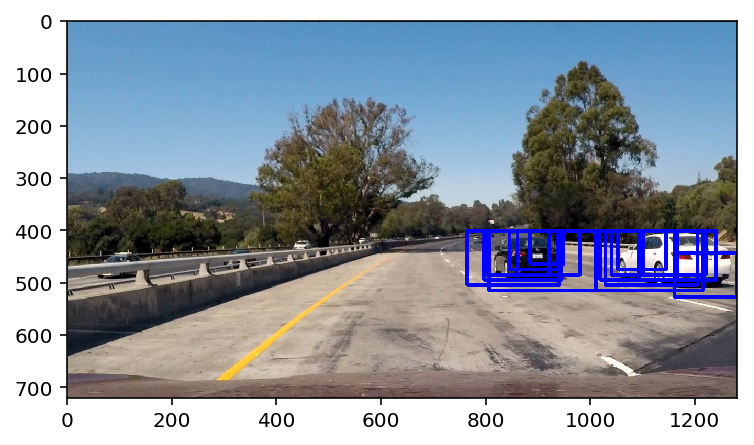

In [29]:
search_params=PARAMS
threshold=1

feat_lst = {}
img_lst = {}
path = glob.glob('test_images/*.jpg')[1]
image = rgb_read(path)
windows = make_many_windows(image)#slide_window(image, y_start_stop=[ystart, ystop])
hot_windows, f, img = search_windows(image, windows, clf, **search_params)


heatmap = get_heatmap(hot_windows, image, threshold=threshold)
window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=6)
plt.imshow(window_img)

In [ ]:
draw_heat(image, heatmap, debug=True)
plt.savefig('examples/heatmap.jpg')

In [ ]:
window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=6)

In [ ]:
import funcy

In [ ]:
#func

In [ ]:
all_img = {}
all_img = 

In [ ]:
for k,v in img_lst.items():
    print(k)
    for i, img in enumerate(v):
        print(i)
        plt.imshow(img)
        plt.show()

In [ ]:
bad_k = 'test_images/test2.jpg'

In [ ]:
pos_examples = []
for k,v in feat_lst.items():
    if k == bad_k:
        continue
    else:
        pos_examples.extend(v)

In [ ]:
neg_examples = feat_lst[bad_k]

In [ ]:
np.array(pos_examples).shape

In [ ]:
np.array(neg_examples).shape

In [ ]:
Xmat2 = np.vstack([Xmat, np.array(neg_examples),
                   np.array(pos_examples)])
pickle.dump(Xmat2, open('Xmat2.pkl', 'wb'))
y2 = np.concatenate([y, np.zeros(len(neg_examples)),
                     np.ones(len(pos_examples))])

In [ ]:

pickle.dump(y2, open('y2.pkl', 'wb'))

In [ ]:
clf.fit(Xmat2, y2)

In [ ]:
clf.score(Xmat2, y2)

In [ ]:
#plt.imshow(process_image(rgb_read(bad_k), clf))

In [ ]:
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=2)
plt.imshow(window_img)

In [ ]:
draw_heat(image, heatmap, debug=True)

In [ ]:
plt.imshow(process_image(cv2.imread('test_images/test1.jpg'), clf))

In [ ]:
from detection.find_cars import find_cars
from detection.constants import PARAMS
import cv2
from lane_lines.nb_start import *
from detection.lesson_functions import *
from detection.constants import PARAMS

In [ ]:
windows = make_many_windows(img)

In [ ]:
 hot_windows = search_windows(image, windows, clf, **PARAMS)

In [ ]:
s1 = slice(window[0][1],window[1][1])
s2 = slice(window[0][0], window[1][0])

In [ ]:
#bug

In [ ]:
#plt.imshow(image[s1,  s2])

In [ ]:

from detection.find_cars import find_cars

In [ ]:
from moviepy.editor import VideoFileClip, ImageSequenceClip


final_output = 'P5_finalb.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(20, 30)

In [ ]:
from detection.video import video_pipeline
from scipy.ndimage.measurements import label

In [ ]:
labels = label(heatmap)

In [ ]:
from detection.heatmap import get_bboxes

In [ ]:
%%time

imgs, heat, feat_vid, fram = video_pipeline(clip1, clf)

In [ ]:
myvid = ImageSequenceClip(imgs, fps=clip1.fps)

In [ ]:
len(fram)

In [ ]:
len(feat_vid)

In [ ]:
np.array(feat_vid).shape

In [ ]:
myvid.write_videofile(final_output, audio=False)

In [ ]:
for img in fram:
    if len(img) > 0:
        plt.imshow(img)
        plt.show()

In [ ]:
Xmat3 = np.vstack([Xmat3, np.array(feat_vid)])
pickle.dump(Xmat3, open('Xmat3.pkl', 'wb'))
y3 = np.concatenate([y3, np.ones(len(feat_vid))])
pickle.dump(y3, open('y3.pkl', 'wb'))

In [ ]:
clf.fit(Xmat3, y3)

In [ ]:
del Xmat2, ymat2

In [ ]:
!open {final_output}